In [62]:
import os, pandas as pd, numpy as np, matplotlib.pyplot as pl, pickle as pkl
from sklearn import model_selection as modele , linear_model as lm, metrics as mes, tree 
import matplotlib as plt
import seaborn as sb

In [63]:
os.getcwd()

'C:\\Users\\HPPC\\regession logistic'

In [64]:
os.chdir("C:\\Users\\HPPC\\regession logistic")

In [65]:
data = pd.read_excel("null.xlsx")
data.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


In [66]:
df = data.copy()
print(df)

     AGE   SEXE  TDT  PAR  CHOLESTEROL  GAJ     ECG  FCMAX ANGINE  \
0     40  homme   AA  140          289    0  Normal    172    Non   
1     49  femme  DNA  160          180    0  Normal    156    Non   
2     37  homme   AA  130          283    0      ST     98    Non   
3     48  femme  ASY  138          214    0  Normal    108    Oui   
4     54  homme  DNA  150          195    0  Normal    122    Non   
..   ...    ...  ...  ...          ...  ...     ...    ...    ...   
913   45  homme   AT  110          264    0  Normal    132    Non   
914   68  homme  ASY  144          193    1  Normal    141    Non   
915   57  homme  ASY  130          131    0  Normal    115    Oui   
916   57  femme   AA  130          236    0     LVH    174    Non   
917   38  homme  DNA  138          175    0  Normal    173    Non   

     DEPRESSION       PENTE  CŒUR  
0            0.0  Ascendant     0  
1            1.0       Plat     1  
2            0.0  Ascendant     0  
3            1.5       Plat

In [67]:
df.duplicated().sum()

0

In [68]:
df.nunique()

AGE             50
SEXE             2
TDT              4
PAR             67
CHOLESTEROL    222
GAJ              2
ECG              3
FCMAX          119
ANGINE           2
DEPRESSION      53
PENTE            3
CŒUR             2
dtype: int64

In [69]:
df.isna().sum()

AGE            0
SEXE           0
TDT            0
PAR            0
CHOLESTEROL    0
GAJ            0
ECG            0
FCMAX          0
ANGINE         0
DEPRESSION     0
PENTE          0
CŒUR           0
dtype: int64

In [70]:
quant = ['AGE', 'PAR', 'CHOLESTEROL', 'FCMAX', 'DEPRESSION ']
#df.rename('DEPRESSION')


In [71]:
def recoder(df):
    for i in df.select_dtypes('object').columns:
        df[i]=df[i].astype('category').cat.codes
    return(df)
recoder(df)

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,1,0,140,289,0,1,172,0,0.0,0,0
1,49,0,3,160,180,0,1,156,0,1.0,2,1
2,37,1,0,130,283,0,2,98,0,0.0,0,0
3,48,0,1,138,214,0,1,108,1,1.5,2,1
4,54,1,3,150,195,0,1,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,2,110,264,0,1,132,0,1.2,2,1
914,68,1,1,144,193,1,1,141,0,3.4,2,1
915,57,1,1,130,131,0,1,115,1,1.2,2,1
916,57,0,0,130,236,0,0,174,0,0.0,2,1


In [72]:
df[quant] = round(df[quant]/df[quant].mean(), 2)

In [73]:
df.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,0.75,1,0,1.06,1.45,0,1,1.26,0,0.00,0,0
1,0.92,0,3,1.21,0.91,0,1,1.14,0,1.13,2,1
2,0.69,1,0,0.98,1.42,0,2,0.72,0,0.00,0,0
3,0.90,0,1,1.04,1.08,0,1,0.79,1,1.69,2,1
4,1.01,1,3,1.13,0.98,0,1,0.89,0,0.00,0,0


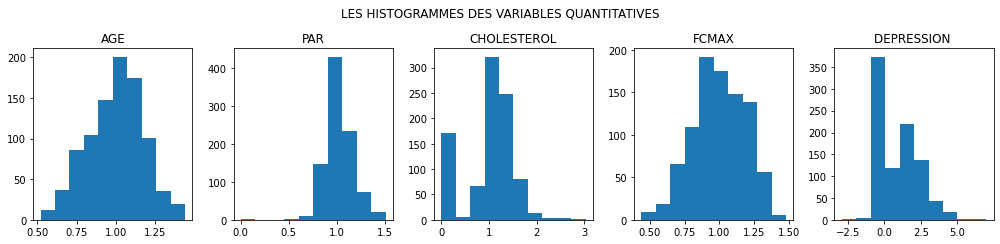

In [74]:
pl.figure(tight_layout = True, figsize = (14, 6))
pl.suptitle("LES HISTOGRAMMES DES VARIABLES QUANTITATIVES")
for y,x in enumerate(quant):
    pl.subplot(2,5,y+1)
    pl.hist(df[x])
    pl.title(f"{quant[y]}")
pl.show()

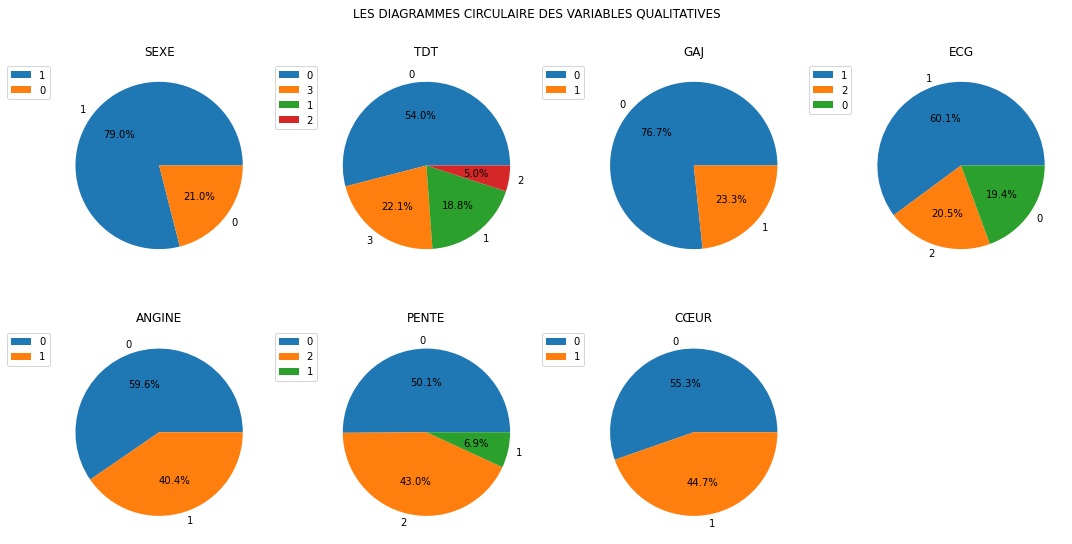

In [75]:
qual = ['SEXE', 'TDT', 'GAJ', 'ECG', 'ANGINE', 'PENTE', 'CŒUR'] # la liste des variables qualitatives

pl.figure(tight_layout = True, figsize = (15,8))
pl.suptitle("LES DIAGRAMMES CIRCULAIRE DES VARIABLES QUALITATIVES")
for y,x in enumerate(qual):
    eff = df[x].value_counts()
    modalite = df[x].unique()
    pl.subplot(2,4,y+1)
    pl.pie(eff, labels = modalite, autopct = '%1.1f%%')
    pl.legend(bbox_to_anchor = (0, 1))
    pl.title(f"{qual[y]}")
pl.show()


In [76]:
X = df.iloc[:, 0:11]
X

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE
0,0.75,1,0,1.06,1.45,0,1,1.26,0,0.00,0
1,0.92,0,3,1.21,0.91,0,1,1.14,0,1.13,2
2,0.69,1,0,0.98,1.42,0,2,0.72,0,0.00,0
3,0.90,0,1,1.04,1.08,0,1,0.79,1,1.69,2
4,1.01,1,3,1.13,0.98,0,1,0.89,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...
913,0.84,1,2,0.83,1.33,0,1,0.96,0,1.35,2
914,1.27,1,1,1.09,0.97,1,1,1.03,0,3.83,2
915,1.07,1,1,0.98,0.66,0,1,0.84,1,1.35,2
916,1.07,0,0,0.98,1.19,0,0,1.27,0,0.00,2


In [77]:
y = data["CŒUR"]
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: CŒUR, Length: 918, dtype: int64

In [78]:
X_train, X_test, Y_train, Y_test = modele.train_test_split(X, y, test_size = 0.2, random_state=1)

In [81]:
# entrainement de modele arbre de decision

modele_arbre = tree.DecisionTreeClassifier ()
modele_arbre.fit(X_train,Y_train)

DecisionTreeClassifier()

In [82]:
# prediction arbre de decision 

modele_arbre.predict_proba(X_test)

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.

In [43]:
mod.predict_proba(X_test)

array([[0.35496203, 0.64503797],
       [0.16960133, 0.83039867],
       [0.03457301, 0.96542699],
       [0.0764487 , 0.9235513 ],
       [0.17768705, 0.82231295],
       [0.74672317, 0.25327683],
       [0.29597548, 0.70402452],
       [0.51735064, 0.48264936],
       [0.96541828, 0.03458172],
       [0.2826058 , 0.7173942 ],
       [0.88994162, 0.11005838],
       [0.6539992 , 0.3460008 ],
       [0.40417279, 0.59582721],
       [0.16705882, 0.83294118],
       [0.09203056, 0.90796944],
       [0.88406903, 0.11593097],
       [0.07255202, 0.92744798],
       [0.79787133, 0.20212867],
       [0.04776453, 0.95223547],
       [0.21131067, 0.78868933],
       [0.07855208, 0.92144792],
       [0.96654432, 0.03345568],
       [0.03879931, 0.96120069],
       [0.96237084, 0.03762916],
       [0.41115221, 0.58884779],
       [0.02625307, 0.97374693],
       [0.86081418, 0.13918582],
       [0.184074  , 0.815926  ],
       [0.14306526, 0.85693474],
       [0.84833901, 0.15166099],
       [0.

In [84]:
# prediction arbre de decision 
pred = modele_arbre.predict(X_test)
pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [44]:
#prediction test 

pred = mod.predict(X_test)

pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [89]:
#score arbre de decision 

modele_arbre.score(X_train,Y_train)

1.0

In [91]:
 # Predicytion globale test 
    
modele_arbre.score(X_test,Y_test)

0.7445652173913043

In [46]:
modele_arbre.(Y_test, pred)

0.9130434782608695

In [47]:
mes.recall_score(Y_test, pred)

0.9272727272727272

In [48]:
mes.precision_score(Y_test, pred)

0.9272727272727272

In [49]:
# sauvegarde du modele de prediction mod

pkl.dump(mod, open('mod.pkl', 'wb' ))